# Data Collection

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\\Users\\lingas\\OneDrive\\Desktop\\heart.csv")

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


-->RestingBP--high blood pressure strains the heart raising the heart failure
-->FastingBS--fasting blood sugar high blood sugar damage the heart
-->RestingECG--eletrocardiogram measures the electrical activity of heart
-->MaxHR--maximum heart beat rate
-->	ExerciseAngina--chest pain experienced or not
-->Oldpeak--which indicate the heart muscle damage

#ChestPainType
1.'ATA'--Atypical angina --it feels like discomfort,tightness,or burning sensation
2.'NAP'--Non-anginal pain--this type pain is not caused by heart related issues but might origninate from muscles,lungs
3.'ASY'--asymptotic indicate the absence of any symptms related to heart
4.'TA'--typical angina potential indicater of heart problems

#Resting blood pressure
1.normal:less than 120/80mmhg(mmhg--millimeters of mercury)
2.elevated--systolic 120-129 diastolic less than 80mmHg
3.stage 1 hyper tension--systolic 130-139 diastolic 80--89mmHg
4.stage 2 hyper tension--systolic 140 or hhigher  diastolic 90 or higher

RestingECG
->normal
->ST--segment on the waveform
->left venticular hypertrophy

# Data Preprocessing

In [4]:
data.shape

(918, 12)

In [5]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Dropping the columns

In [8]:
data.drop(columns=["Oldpeak","ST_Slope"],inplace=True)

In [9]:
data.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,HeartDisease
474,62,M,ATA,131,0,0,Normal,130,N,0
523,59,M,ASY,124,160,0,Normal,117,Y,1
107,34,M,ATA,150,214,0,ST,168,N,0
391,70,M,ASY,115,0,0,ST,92,Y,1
437,64,M,ASY,120,0,1,ST,106,N,1


# Converting Catagorical values into numerical values

In [10]:
data["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [11]:
data["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [12]:
data["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [13]:
data["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [14]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0
1,49,F,NAP,160,180,0,Normal,156,N,1
2,37,M,ATA,130,283,0,ST,98,N,0
3,48,F,ASY,138,214,0,Normal,108,Y,1
4,54,M,NAP,150,195,0,Normal,122,N,0
...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1
914,68,M,ASY,144,193,1,Normal,141,N,1
915,57,M,ASY,130,131,0,Normal,115,Y,1
916,57,F,ATA,130,236,0,LVH,174,N,1


# Data Visualisation

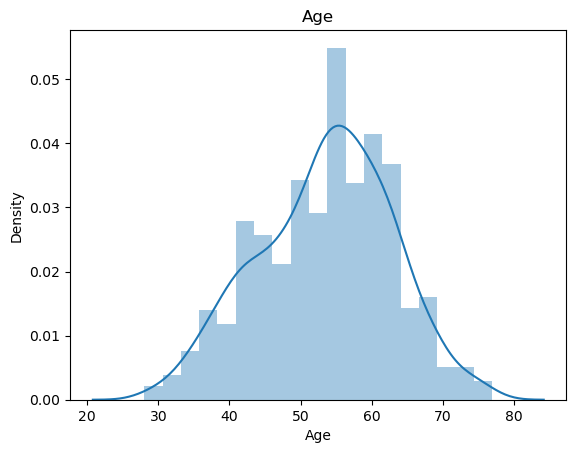

In [15]:
sns.distplot(data["Age"])
plt.title("Age")
plt.show()

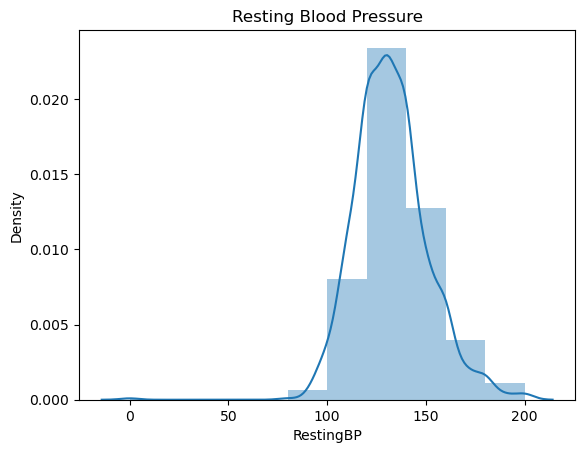

In [16]:
sns.distplot(data["RestingBP"],bins=10)
plt.title("Resting Blood Pressure")
plt.show()

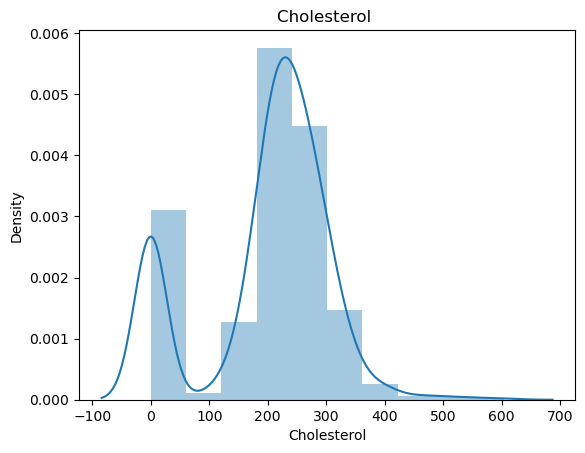

In [17]:
sns.distplot(data["Cholesterol"],bins=10)
plt.title("Cholesterol ")
plt.show()

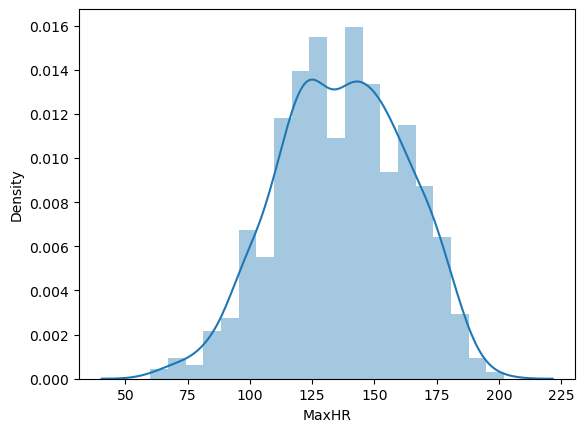

In [18]:
sns.distplot(data["MaxHR"])
plt.show()

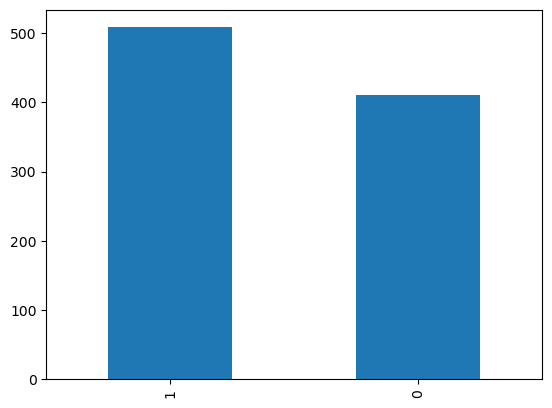

In [19]:
data["HeartDisease"].value_counts().plot(kind='bar')
plt.show()
#0->no 1-->yes 

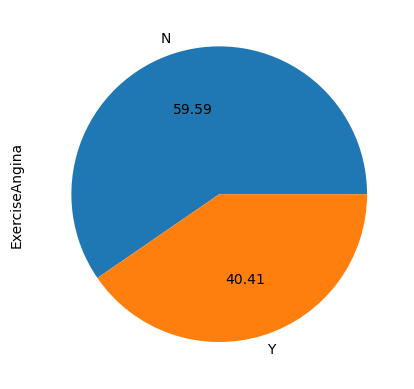

In [20]:
data["ExerciseAngina"].value_counts().plot(kind="pie",autopct="%.2f")
plt.show()

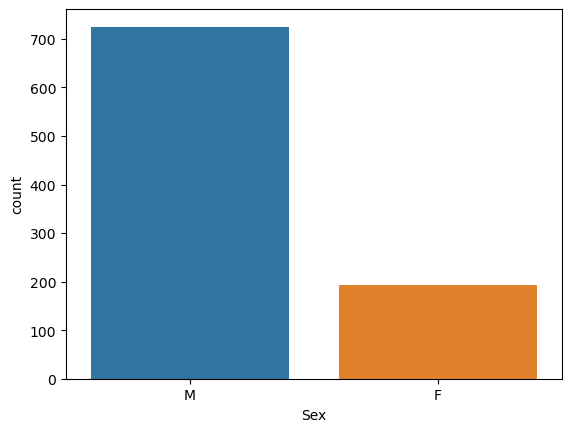

In [21]:
sns.countplot(data["Sex"])
plt.show()

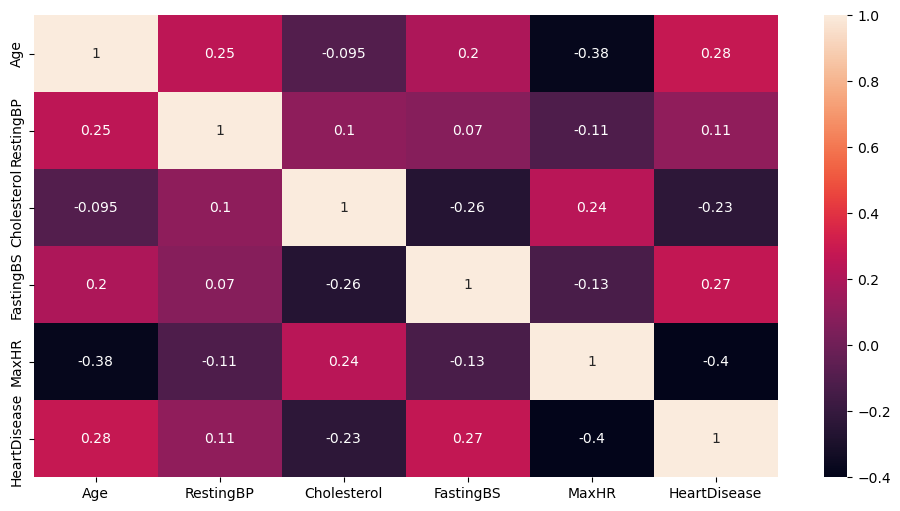

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [23]:
data=pd.get_dummies(data)

In [24]:
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289,0,172,0,0,1,0,1,0,0,0,1,0,1,0
1,49,160,180,0,156,1,1,0,0,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0,0,1,0,1,0,0,0,0,1,1,0
3,48,138,214,0,108,1,1,0,1,0,0,0,0,1,0,0,1
4,54,150,195,0,122,0,0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,0,1,0,0,0,1,0,1,0,1,0
914,68,144,193,1,141,1,0,1,1,0,0,0,0,1,0,1,0
915,57,130,131,0,115,1,0,1,1,0,0,0,0,1,0,0,1
916,57,130,236,0,174,1,1,0,0,1,0,0,1,0,0,1,0


# Feature Selection

In [25]:
x=data.drop(columns='HeartDisease')
y=data["HeartDisease"]

In [26]:
print(x)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Sex_F  Sex_M  \
0     40        140          289          0    172      0      1   
1     49        160          180          0    156      1      0   
2     37        130          283          0     98      0      1   
3     48        138          214          0    108      1      0   
4     54        150          195          0    122      0      1   
..   ...        ...          ...        ...    ...    ...    ...   
913   45        110          264          0    132      0      1   
914   68        144          193          1    141      0      1   
915   57        130          131          0    115      0      1   
916   57        130          236          0    174      1      0   
917   38        138          175          0    173      0      1   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0                    0                  1                  0   
1                    0                  0              

In [27]:
print(y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


# Splitting the Data Training and Testing

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=73)

In [29]:
print(x_train.shape,y_train.shape)

(826, 16) (826,)


In [30]:
print(x_test.shape,y_test.shape)

(92, 16) (92,)


Model selection

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [74]:
model_df={}
def model_val(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=73)
    
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    result=accuracy_score(y_test,y_pred)
    print(f"{model} accuracy score is {result*100}")
    score=cross_val_score(model,x,y,cv=10)
    print(f"{model} average cross_val_score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)
                                 

In [75]:
model_df

{}

In [76]:
model=LogisticRegression()

In [77]:
model_val(model,x,y)
                                 

LogisticRegression() accuracy score is 90.21739130434783
LogisticRegression() average cross_val_score is 0.787541806020067
